In [67]:
# Loading matrices
import os
import glob

folder = 'D:\\adjacency_matrices_NetworkToolbox_INF\\'
all_matrices = glob.glob(folder + 'sub*_adj_*')

In [68]:
# Storing matrices into 3d numpy array
import pandas as pd
import numpy as np

#all_matrices = all_matrices[0:200] # for testing purposes
X = np.zeros([int((57 * 56)/2), len(all_matrices)])

participants_id = []
for i, matrix in enumerate(all_matrices):
    m = np.array(pd.read_csv(matrix).iloc[: , 1:]) # matrix for the current subject / session
    mask = np.arange(m.shape[0])[:,None] > np.arange(m.shape[1]) # mask with tril == True
    X[:,i] = m[mask]
    participants_id.append(matrix.split('_')[4])


In [69]:
X.shape # rows = connections ((n regions * nregions-1)/2), cols = subjects

(1596, 1185)

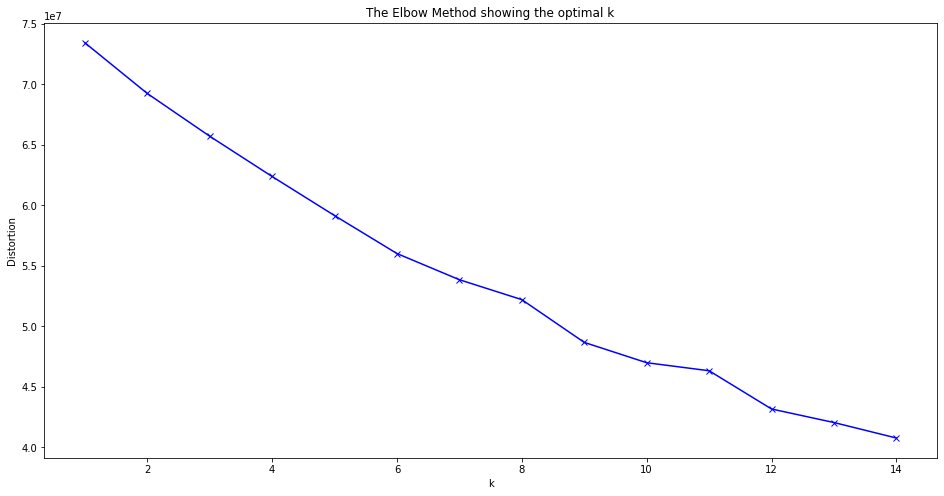

In [79]:
# Implementation of elbow method to find optimal n_cluster

from sklearn.cluster import KMeans

distortions = []
K = range(1,15)
for k in K:
    
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

fig = plt.figure(figsize=(16,8))
fig.patch.set_facecolor('xkcd:white')

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [104]:
# k means using n_cluster = 6, but that's a rather arbitrary choice

k_means = KMeans(n_clusters=6, random_state=0).fit_predict(X)

In [114]:
# We reshape the k_means labels to the original matrix shape
kmeans_matrix = np.tril(np.ones([57,57]), k=-1);
kmeans_matrix[kmeans_matrix > 0] = k_means;


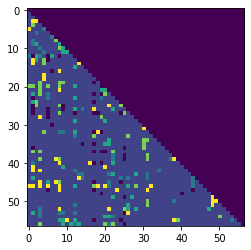

In [115]:
import matplotlib.pyplot as plt

plt.imshow(kmeans_matrix)

In [ ]:
# NOT USED ANYMORE (SUBJECT-LEVEL K MEANS)
# Where to store all kmeans
all_kmeans = []

for subject in np.unique(participants_id):
    mask = np.where(participants_id == subject, True, False)
    this_subject_data = X[:,mask]
    all_kmeans.append(KMeans(n_clusters=7, random_state=0).fit_predict(this_subject_data))

In [ ]:
#import matplotlib.pyplot as plt

#fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(35,35))
#fig.patch.set_facecolor('xkcd:white')

#for i, this_kmean in enumerate(all_kmeans):
#    row = int(i/6);
#    col = int(i%6); 
    #axes[row][col].imshow(all_kmeans[i].reshape([57,57]))